## Problema de prueba de hipótesis


**Supongamos que se tiene una línea de producción de cierto producto, en donde el
envasado debe llenar cajas con 720 gramos. Sin embargo, se sospecha que las
máquinas no están calibradas, por lo que las cajas se podrían estar llenando con una
cantidad de producto inadecuada (en exceso o en defecto). Se sabe además que las
máquinas funcionan con un error estándar de 7 gramos.
El objetivo es determinar si las máquinas funcionan correctamente.**


Sea X la VA que resulta de pesar un conjunto de cajas en una MA de tamaño N.

$$X:\Omega\to R$$

Se quiere probar la hipótesis:

$$H_0: \mu=720$$

El estadístico de la prueba es $$\hat{\mu} = \bar{X}$$

Primero veamos cómo es la distribución teórica de X bajo hipótesis nula.  Se espera que la distribución sea normal, por el TLC.

$$X \sim N\left(\mu, \frac{\sigma}{\sqrt N}\right)$$

### Distribución del peso de las cajas

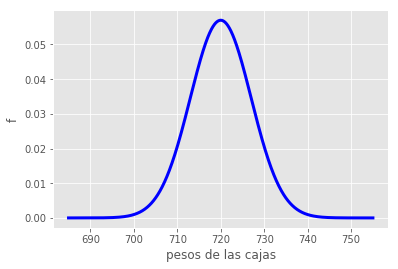

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

plt.style.use('ggplot')

mean = 720
std = 7

x = np.linspace(mean - 5 * std, mean + 5 * std, 1000)

dist_X = stats.norm(mean, std)
plt.plot(x, dist_X.pdf(x), 'b-', lw=3)
plt.xlabel('pesos de las cajas')
plt.ylabel('f')

### Distribución del promedio de una muestra

Supongamos que tomamos una muestra aleatoria de N=30 cajas, y definimos una nueva VA:

$$MA: \{X_i\}_{i=1}^n$$

$$\bar{X} = \frac{1}{N} \sum_{i=1}^n X_i$$

Por la propiedad reproductiva de la normal, la media se distribuye como:

$$\bar{X} \sim N(\mu, \sigma/\sqrt(N))$$

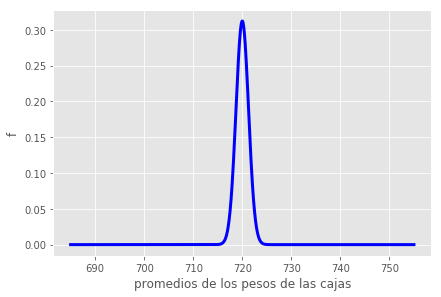

In [23]:
N = 30

std_med = std/np.sqrt(N)
dist_Xmed = stats.norm(mean, std_med)

plt.plot(x, dist_Xmed.pdf(x), 'b-', lw=3)
plt.tight_layout()
plt.xlabel('promedios de los pesos de las cajas')
plt.ylabel('f')

Ahora para hacer la prueba de hipótesis, planetamos un valor para el nivel de confianza.  Supongamos que pedimos un nivel de confianza del 95%

In [24]:
alpha = 0.05
mn = mean - 5 * std_med
mx = mean + 5 * std_med
xm = x = np.linspace(mn, mx, 1000)

q1 = alpha/2
q2 = 1-q1

In [25]:
print dist_Xmed.ppf(q1)
print dist_Xmed.ppf(q2)

717.495128199
722.504871801


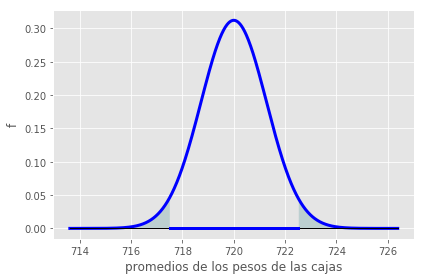

In [7]:
plt.plot(xm, dist_Xmed.pdf(xm), 'b-', lw=3)
plt.fill_between(
        xm, dist_Xmed.pdf(xm),
        where=xm < dist_Xmed.ppf(q1),
        color='cadetblue',
        alpha=0.3,
        linewidth=0)
plt.fill_between(
        xm, dist_Xmed.pdf(xm),
        where=xm > dist_Xmed.ppf(q2),
        color='cadetblue',
        alpha=0.3,
        linewidth=0)

plt.xlabel('promedios de los pesos de las cajas')
plt.ylabel('f')
plt.plot([mean - 5 * std_med, mean + 5 * std_med],[0,0], c='k', lw=1)
plt.plot([dist_Xmed.ppf(q1), dist_Xmed.ppf(q2)],[0,0], c='blue', lw=3)
plt.tight_layout()

El segmento que corresponde a la parte pintada es la región de rechazo.

### Prueba de hipótesis cuando la hipótesis nula es verdadera

Ahora sorteamos una MA para simular el experimento:

In [8]:
X = dist_X.rvs(N)
print X
Xhat = np.mean(X)
print Xhat

[ 714.65651003  717.39222638  715.91931091  733.79278569  718.68594901
  714.93560857  724.59535176  715.49696781  726.31951382  727.65045223
  718.27462804  715.16880171  723.03857836  723.55822785  724.99081079
  713.30168735  712.58091266  720.28525051  737.53897318  720.48430913
  717.09608349  712.99055485  726.26662663  720.27127806  726.84780594
  714.46177881  724.53135936  720.40760347  727.8007823   724.5253548 ]
721.12886945


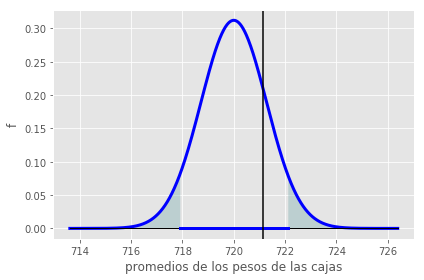

In [9]:
alpha = 0.05
xm = x = np.linspace(mean - 5 * std_med, mean + 5 * std_med, 1000)

q1 = alpha/1
q2 = 1-q1

IC_inf = dist_Xmed.ppf(q1)
IC_sup = dist_Xmed.ppf(q2)

plt.plot(xm, dist_Xmed.pdf(xm), 'b-', lw=3)
plt.fill_between(
        xm, dist_Xmed.pdf(xm),
        where=xm < IC_inf,
        color='cadetblue',
        alpha=0.3,
        linewidth=0)
plt.fill_between(
        xm, dist_Xmed.pdf(xm),
        where=xm > IC_sup,
        color='cadetblue',
        alpha=0.3,
        linewidth=0)

plt.xlabel('promedios de los pesos de las cajas')
plt.ylabel('f')
plt.plot([mean - 5 * std_med, mean + 5 * std_med],[0,0], c='k', lw=1)
plt.plot([dist_Xmed.ppf(q1), dist_Xmed.ppf(q2)],[0,0], c='blue', lw=3)
plt.axvline(x=Xhat, c='black')
plt.tight_layout()

Notar que a veces se acepta la hipótesis nula y a veces se rechaza.  Si H0 fuera verdadera, deberíamos rechazarla con probabilidad $\alpha$.  Veamos si se cumple.  Para eso vamos a generar muchas muestras aleatorias y ver qué fracción de veces cometemos el error de tipo I.

In [10]:
Nexperiments = 1000
N = 100

std_med = std/np.sqrt(N)
dist_Xmed = stats.norm(mean, std_med)
q1 = alpha/2
q2 = 1-q1
IC_inf = dist_Xmed.ppf(q1)
IC_sup = dist_Xmed.ppf(q2)

h0 = []

for _ in range(Nexperiments):
    X = dist_X.rvs(N)
    Xhat = np.mean(X)
    h0.append(np.logical_and(Xhat>IC_inf, Xhat<IC_sup))


In [11]:
print sum(h0)/float(Nexperiments)
print 1-alpha

0.942
0.95


## Rechazo de la hipótesis nula y errores teóricos

Supongamos ahora que la hipótesis nula es falsa, las máquinas funcionan mal, y cargan en promedio 712 gramos.  Vamos a probar la hipótesis de que en realidad funcionan bien, es decir:

$$\mu=712$$

$$H_0: \mu=720$$


Ahora la distribución verdadera de los pesos medios de las cajas en muestras de tamaño N y la distribución bajo hipótesis nula no coinciden!

In [32]:
N = 20

# Distribucion verdadera:

mu_true = 710
std_true = 7
std_true_med = std_true/np.sqrt(N)
dist_X_true_med = stats.norm(mu_true, std_true_med)

# Distribución si la hipótesis nula fuera cierta:
mu_H0 = 720
std_H0 = 7
std_H0_med = std_H0/np.sqrt(N)
dist_X_H0_med = stats.norm(mu_H0, std_H0_med)

In [33]:
X = dist_X_true_med.rvs(N)
Xhat = np.mean(X)

Calculemos también el error tipo II

In [34]:
#beta = dist_X_true_med.

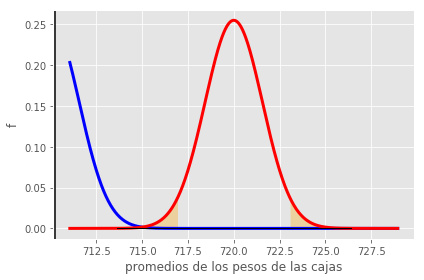

In [35]:
xm = x = np.linspace(mean - 7 * std_med, mean + 7 * std_med, 1000)

plt.plot(xm, dist_X_true_med.pdf(xm), 'b-', lw=3)
plt.fill_between(
        xm, dist_X_true_med.pdf(xm),
        where=np.logical_and(xm <dist_X_H0_med.ppf(q2) , xm>dist_X_H0_med.ppf(q1)),
        color='blue',
        alpha=0.3,
        linewidth=0)

plt.plot(xm, dist_X_H0_med.pdf(xm), 'r-', lw=3)
plt.fill_between(
        xm, dist_X_H0_med.pdf(xm),
        where=xm < dist_X_H0_med.ppf(q1),
        color='orange',
        alpha=0.3,
        linewidth=0)
plt.fill_between(
        xm, dist_X_H0_med.pdf(xm),
        where=xm > dist_X_H0_med.ppf(q2),
        color='orange',
        alpha=0.3,
        linewidth=0)

plt.xlabel('promedios de los pesos de las cajas')
plt.ylabel('f')
plt.plot([mean - 5 * std_med, mean + 5 * std_med],[0,0], c='k', lw=1)
plt.axvline(x=Xhat, c='black')
plt.tight_layout()

In [36]:
dist_X_true_med.cdf(dist_X_H0_med.ppf(q2)) - dist_X_true_med.cdf(dist_X_H0_med.ppf(q1))

4.7379055666540992e-06

Veamos que pasa con los errores cuando cambian las condiciones del experimento.  Recordar que hay que proponer un valor de $\alpha$ pero no se tiene control sobre el error de tipo II ($\beta$).

Primero variamos el tamaño de la muestra:

In [39]:
# Distribucion verdadera:
mu_true = 718
std_true = 7

# Distribución si la hipótesis nula fuera cierta:
mu_H0 = 720
std_H0 = 7

nn = [np.power(10,k) for k in np.linspace(1, 2.5, 20)]
nn = np.floor(nn)

In [40]:
nn

array([  10.,   11.,   14.,   17.,   20.,   24.,   29.,   35.,   42.,
         51.,   61.,   73.,   88.,  106.,  127.,  152.,  183.,  219.,
        263.,  316.])

In [41]:
beta = []

for N in nn:
    std_true_med = std_true/np.sqrt(N)
    dist_X_true_med = stats.norm(mu_true, std_true_med)
    std_H0_med = std_H0/np.sqrt(N)
    dist_X_H0_med = stats.norm(mu_H0, std_H0_med)
    beta.append(dist_X_true_med.cdf(dist_X_H0_med.ppf(q2)) - dist_X_true_med.cdf(dist_X_H0_med.ppf(q1)))

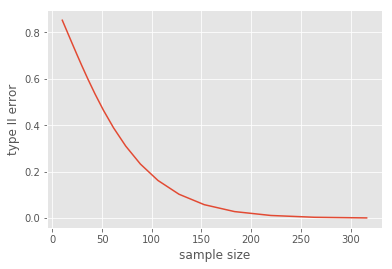

In [19]:
plt.plot(nn, beta)
plt.xlabel('sample size')
plt.ylabel('type II error')

Ahora variamos la media verdadera de la distribución.

In [20]:
std_true = std_H0 = 7
mu = np.linspace(710, 730, 50)
mu_H0 = 720
N = 20

beta = []

for mu_true in mu:
    
    std_true_med = std_true/np.sqrt(N)
    dist_X_true_med = stats.norm(mu_true, std_true_med)
    std_H0_med = std_H0/np.sqrt(N)
    dist_X_H0_med = stats.norm(mu_H0, std_H0_med)
    beta.append(dist_X_true_med.cdf(dist_X_H0_med.ppf(q2)) - dist_X_true_med.cdf(dist_X_H0_med.ppf(q1)))

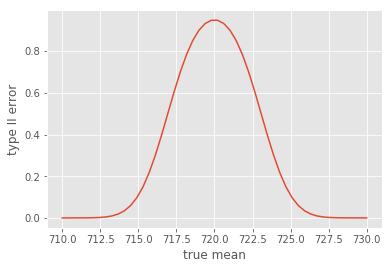

In [21]:
plt.plot(mu, beta)
plt.xlabel('true mean')
plt.ylabel('type II error')

Ahora veamos si para N fijo y para $\mu$ fijo cambiamos $\alpha$: